# Workshop Artificial Intelligence
# MNIST with fully connected networks and grid/random search

The following code imports the NumPy library, a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. Moreover, the code imports parts of the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python. In addition, the code imports the os module, which provides a way of interacting with the operating system. Also, the TensorFlow library is imported. It is an open-source machine learning framework. TensorFlow is widely used for building and training deep learning models. Furthermore, the code imports the tabulate library, which is used for creating nicely formatted tables from various data sources, such as Python lists and dictionaries. Finally, the code imports the layers module from the Keras API, which is integrated into TensorFlow. Keras is a high-level neural networks API, and the layers module contains building blocks for constructing neural network architectures.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tabulate import tabulate
from tensorflow.keras import layers
import math

The MNIST data base of handwritten numbers is directly available through KERAS. The following codeblocks download and preprocess the data.

The following code is preparing image data for a machine learning model by dividing it into training, validation, and test sets, and then normalizing the pixel values for better model convergence.

In [ ]:
# load input and output data for training and test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#X sind die Eingabedaten, Y sind die Zieldaten - korrekte Antwort

# divide test data into test data and validation data
x_valid = x_test[8000:] #Alle Elemente ab 8000 bis zum Ende von x_test, also 2000
y_valid = y_test[8000:]
x_test = x_test[:8000]  #Alle Elemente vom Anfang bis ausschließlich 8000, also 8000
y_test = y_test[:8000]

# analyze input data
print("Min value input data before conversion:", np.amin(np.concatenate((x_train, x_valid, x_test))))
#kleinster Wert wird durch np.amin gesucht, aus einem konzentireten Array bestehend aus train valid und testdaten
print("Max value input data before conversion:", np.amax(np.concatenate((x_train, x_valid, x_test))))
print()

# convert input data
#Pixelwerte sind oft in Zahlen von 0 bis 255 dargestellt, danach 0.0 bis 1.0, sind bessere Werte für nn
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

# analyze input data
print("Min value input data after conversion:", np.amin(np.concatenate((x_train, x_valid, x_test))))
print("Max value input data after conversion:", np.amax(np.concatenate((x_train, x_valid, x_test))))
print()
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_valid.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Min value input data before conversion: 0
Max value input data before conversion: 255

Min value input data after conversion: 0.0
Max value input data after conversion: 1.0

x_train shape: (60000, 28, 28)
60000 train samples
2000 validation samples
8000 test samples


In this exercise, a fully connected neural network is used to predict the handwritten numbers. To do this, we reformat the pictures with 28x28 pixels into a vector with a length of 28x28=784.

In [ ]:
# Die Daten werden in eindimensionale Arrays umgeformt
x_train = x_train.reshape(-1, 28**2) #28**2 = 784
x_valid = x_valid.reshape(-1, 28**2)
x_test = x_test.reshape(-1, 28**2)
print("x_train shape:", x_train.shape)
input_shape = x_train.shape[1]

x_train shape: (60000, 784)


We use "onehot" encoding of the classes. This means a zero is encoded as `[1,0,0,0,0,0,0,0,0,0]` a one as `[0,1,0,0,0,0,0,0,0,0]` etc.
This is done because our network will have ten output nodes with the output node with the largest value being the predicted number.

In [ ]:
# convert class vectors to binary class matrices (10 numbers/classes)
#Klassenzuordnung von Ganzzahlen in One-Hot-Vektoren umwandeln,
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_valid_onehot = tf.keras.utils.to_categorical(y_valid, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

### 🔧 To be done
Modify the lines marked with "...".


The following code constructs a simple neural network with a specified architecture, suitable for a classification task. The ReLU activation is used for hidden layers, and softmax is applied to the output layer for probability distribution over classes.

In [ ]:

# define model here
model = tf.keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),      # Hidden layer hinzugefügt
    layers.Dense(10, activation='softmax')    # softmax actication to transform output into probabilities
])


print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


 The following code encompasses the key steps in training a neural network for a classification task, including model compilation, callback definition, and the training process with specified metrics and callbacks.

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # the recommended loss for a classification task is 'categorical_crossentropy' (see lecture for details)
    #Verlustfunktion für Klassifikationsproblem, misst wie gut die vorhergesagte Wahrscheinlichkeitsverteilung ist
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']) # we use accuracy to quanitfy to network performance.

# define callbacks for training
save_best = tf.keras.callbacks.ModelCheckpoint(
    "best_model_{}.weights.h5".format(model.name), #hier werden die Gewichte gespeichert
    save_best_only=True,          #nur das Modell mit der besten Validierungsgenauigkeit wird gespeichert, nicht bei jeder Epoche
    monitor="val_accuracy",       #Die MEtrik die überwacht wird -> Validierungsgenauigkeit - also wie gut das Modell mit validdaten ist
    save_weights_only=True,       #Nur die Gewichte werden gespeichert, nicht die gesamt Architektur
)

# Keras berechnet während des Trainings die Genauigkeit und den Verlust auf den Trainingsdaten mit angewendeter Regularisierung,
# während die Validierungsmetriken am Ende jeder Epoche berechnet werden.
# Dieser Callback berechnet die Trainingsmetriken auf die gleiche Weise wie für die Validierung.
class CalculateMetrics(tf.keras.callbacks.Callback): #Erstellt eine neue Callback-Klasse, die von Keras' Callback erbt
    def on_epoch_end(self, epoch, logs={}):          #wird am ende jeder Epoche aufgerufen
        train_loss, train_acc = model.evaluate(x_train, y_train_onehot, verbose=0) #macht eine vollständige Bewertung des Modells afu den Trainingsdaten
        logs["train_loss"] = train_loss  #Speichert den Trainingsvelust in den Logs
        logs["train_acc"] = train_acc

#Training wird gestartet
results = model.fit(
    x_train, y_train_onehot,                    #Eingabedaten und Zielwerte
    validation_data=(x_valid, y_valid_onehot),  #Validierungsdaten nach jeder Epoche
    batch_size=64,
    epochs=10,              #10x über die Trainigsdaten trainiert
    callbacks=[
        save_best,            #speichert die besten gewichte basierend auf
        CalculateMetrics(),
        tf.keras.callbacks.CSVLogger("history_{}.csv".format(model.name)) #der CSVLogger speichert alle Metriken nach jeder Epoche in einer CSV Datei
    ]
    )

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8585 - loss: 0.4945 - val_accuracy: 0.9695 - val_loss: 0.0937 - train_loss: 0.1200 - train_acc: 0.9652
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9651 - loss: 0.1189 - val_accuracy: 0.9800 - val_loss: 0.0681 - train_loss: 0.0699 - train_acc: 0.9787
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9772 - loss: 0.0766 - val_accuracy: 0.9840 - val_loss: 0.0546 - train_loss: 0.0665 - train_acc: 0.9786
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.9855 - val_loss: 0.0552 - train_loss: 0.0480 - train_acc: 0.9850
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9865 - val_loss: 0.0464 - train_loss: 0.0278 - train_acc: 0.9921
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9835 - val_loss: 0.0560 - train_loss: 0

### 🔧 To be done
Modify the lines marked with "...".


The following code visualizes the training and validation accuracy recorded during the model training process. The x-axis represents epochs, and the y-axis represents accuracy. The plot includes two lines: one for training accuracy and one for validation accuracy.

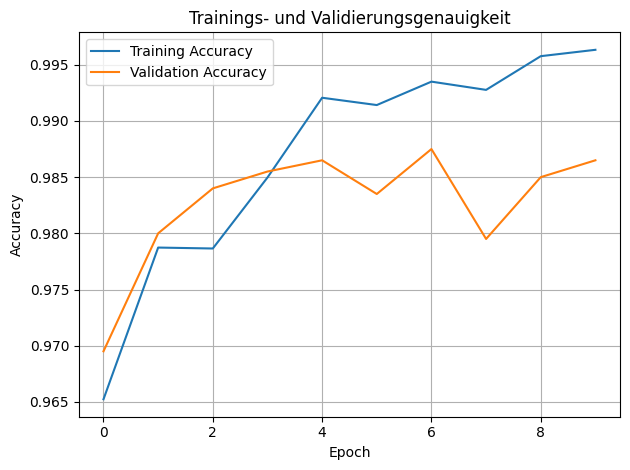

In [ ]:
# load best model
model.load_weights(f"best_model_{model.name}.weights.h5") #lädt die besten gespeicherten Gewichte

# plot training history
history = np.genfromtxt(f"history_{model.name}.csv", delimiter=",", names=True)
#liest die csv Datei ein die durch den logger callback erstellt wurde und die Trainingsdaten enthält, np.genfromtxt für laden als NumPy-Array
fig, ax = plt.subplots(1)
ax.plot(history['epoch'], history['train_acc'], label='Training Accuracy') #x-Achse, y-Achse, Label
ax.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Trainings- und Validierungsgenauigkeit')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

The following code obtains loss and accuracy metrics, calculates the test error rate, and then prints a formatted table summarizing the model's performance.

In [ ]:
# evaluate performance
print("Model performance :")
headers = ["", "Loss", "Accuracy", "Test error rate [%]"]

table = [
    ["Train", *model.evaluate(x_train, y_train_onehot, verbose=0, batch_size=128), (1-model.evaluate(x_train, y_train_onehot, verbose=0, batch_size=128)[1])*100 ],
    ["Validation", *model.evaluate(x_valid, y_valid_onehot, verbose=0, batch_size=128), (1-model.evaluate(x_valid, y_valid_onehot, verbose=0, batch_size=128)[1])*100 ],
    ["Test", *model.evaluate(x_test, y_test_onehot, verbose=0, batch_size=128), (1-model.evaluate(x_test, y_test_onehot, verbose=0, batch_size=128)[1])*100 ],
]
#model evaluate vergleicht die Vorhersagen mit den tatsächlichen Zielwerten

print(tabulate(table, headers=headers, tablefmt="orgtbl")) #print der Tabelle

Model performance :
|            |      Loss |   Accuracy |   Test error rate [%] |
|------------+-----------+------------+-----------------------|
| Train      | 0.0220091 |     0.9935 |              0.650001 |
| Validation | 0.0551659 |     0.9875 |              1.25     |
| Test       | 0.0837983 |     0.976  |              2.4      |


You can compare your own results with a variety of different models: http://yann.lecun.com/exdb/mnist/ and https://en.wikipedia.org/wiki/MNIST_database

The following codeblocks define some helper functions for plotting. You don't need to touch them

In [ ]:
def plot_image(X, ax=None):
    """Plot an image X.

    Args:
        X (2D array): image, grayscale or RGB
        ax (None, optional): Description
    """
    if ax is None:
        ax = plt.gca()

    if (X.ndim == 2) or (X.shape[-1] == 1):
        ax.imshow(X.astype('uint8'), origin='upper', cmap=plt.cm.Greys)
    else:
        ax.imshow(X.astype('uint8'), origin='upper')

    ax.set(xticks=[], yticks=[])

def plot_prediction(Yp, X, y, classes=None, top_n=False):
    """Plot an image along with all or the top_n predictions.

    Args:
        Yp (1D array): predicted probabilities for each class
        X (2D array): image
        y (integer): true class label
        classes (1D array, optional): class names
        top_n (int, optional): number of top predictions to show
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.2))
    plt.subplots_adjust(left=0.02, right=0.98, bottom=0.15, top=0.98, wspace=0.02)
    plot_image(X, ax1)

    if top_n:
        n = top_n
        s = np.argsort(Yp)[-top_n:]
    else:
        n = len(Yp)
        s = np.arange(n)[::-1]

    patches = ax2.barh(np.arange(n), Yp[s], align='center')
    ax2.set(xlim=(0, 1), xlabel='Probability', yticks=[])

    for iy, patch in zip(s, patches):
        if iy == y:
            patch.set_facecolor('C1')  # color correct patch

    if classes is None:
        classes = np.arange(0, np.size(Yp))

    for i in range(n):
        ax2.text(0.05, i, classes[s][i], ha='left', va='center')

    plt.show()

def plot_confusion(yp, y, classes=None, fname=None):
    """Plot confusion matrix for given true and predicted class labels

    Args:
        yp (1D array): predicted class labels
        y (1D array): true class labels
        classes (1D array): class names
        fname (str, optional): filename for saving the plot
    """
    if classes is None:
        n = max(max(yp), max(y)) + 1
        classes = np.arange(n)
    else:
        n = len(classes)

    bins = np.linspace(-0.5, n - 0.5, n + 1)
    C = np.histogram2d(y, yp, bins=bins)[0]
    C = C / np.sum(C, axis=0) * 100

    fig = plt.figure(figsize=(8, 8))
    plt.imshow(C, interpolation='nearest', vmin=0, vmax=100, cmap=plt.cm.YlGnBu)
    plt.gca().set_aspect('equal')
    cbar = plt.colorbar(shrink=0.8)
    cbar.set_label('Frequency %')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.xticks(range(n), classes, rotation='vertical')
    plt.yticks(range(n), classes)
    for x in range(n):
        for y in range(n):
            if np.isnan(C[x, y]):
                continue
            color = 'white' if x == y else 'black'
            plt.annotate('%.1f' % (C[x, y]), xy=(y, x), color=color, ha='center', va='center')

    plt.show()

The following code plots the model predictions (output) for the first 10 test samples alongside the corresponding original images (x_test[i]) and their true labels (labels[i]).

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


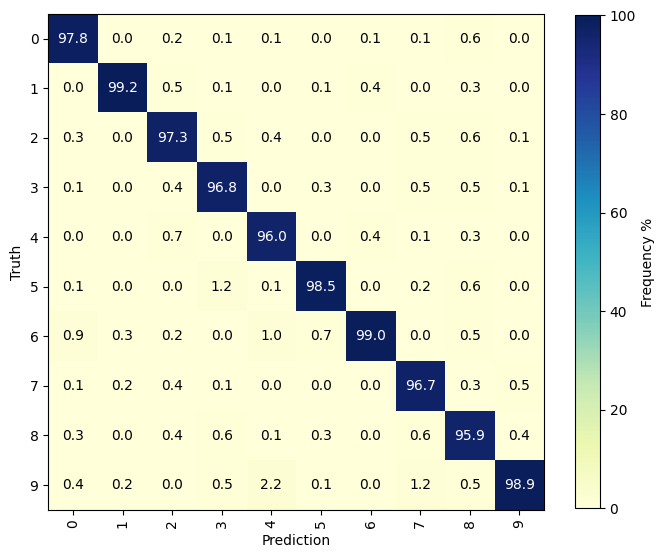

In [ ]:
# get missidentified samples
output = model.predict(x_test, batch_size=128)
labels = np.argmax(y_test_onehot, axis=1)
predictions = np.argmax(output, axis=1)
plot_confusion(predictions, labels)

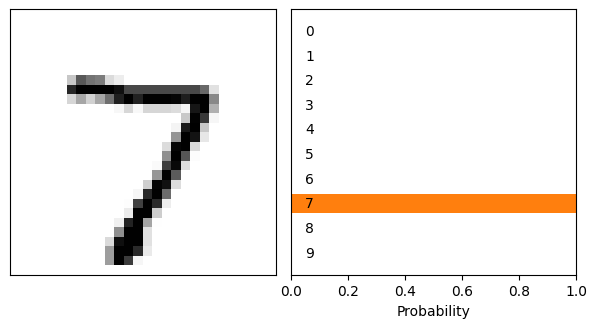

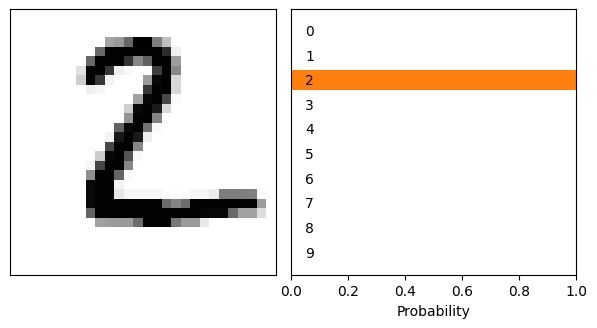

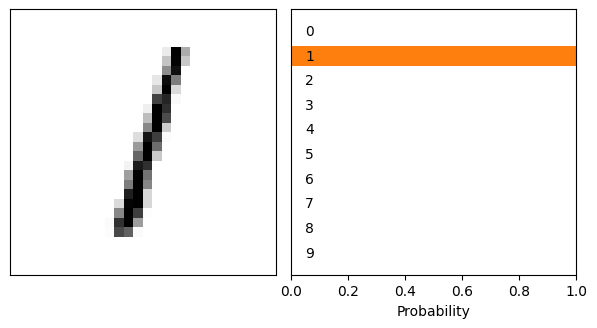

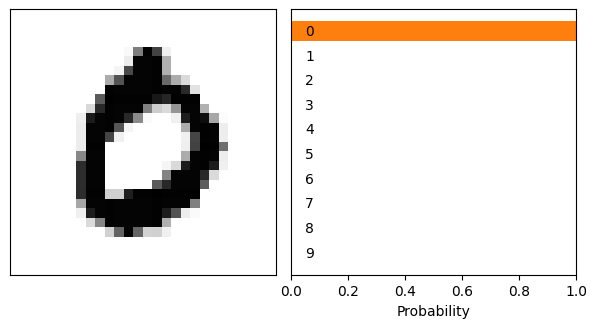

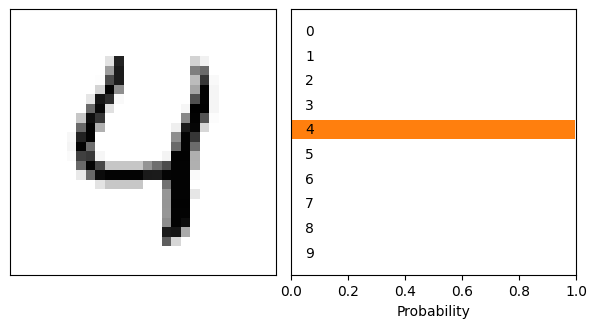

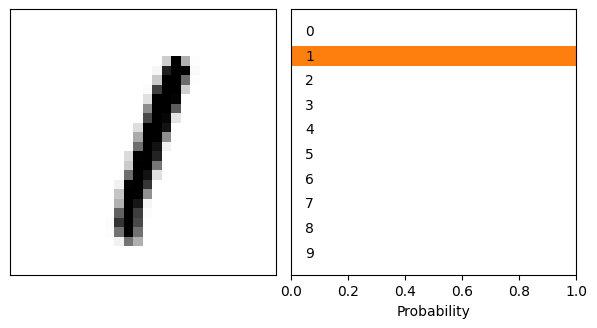

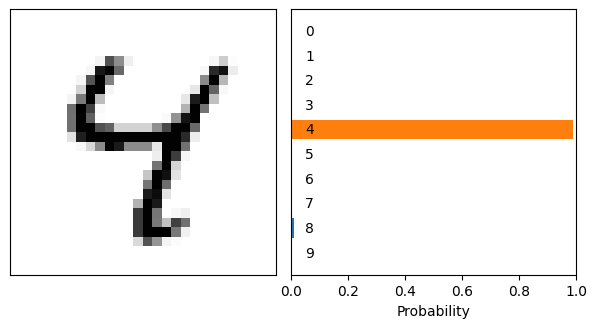

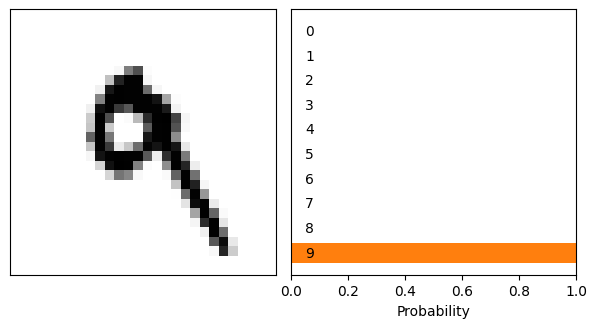

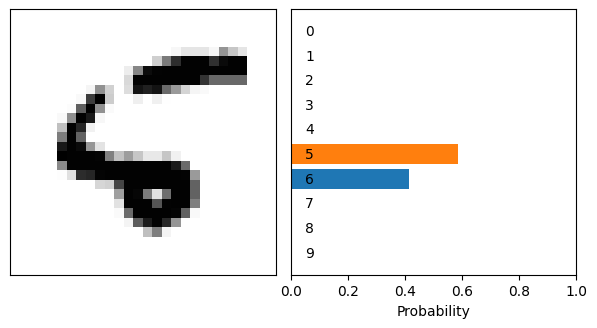

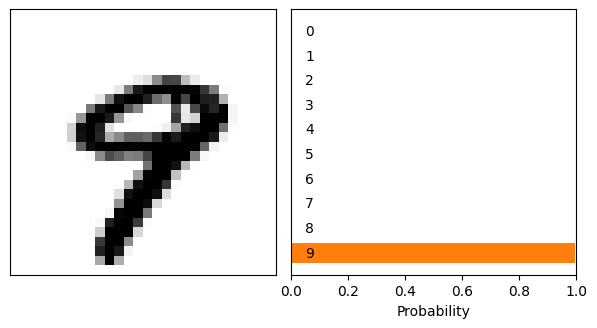

In [ ]:
# plot a few examples, loop over test dataset:
for i in range(10): # loop over first 10 test samples
    plot_prediction(output[i],
                    255 * np.reshape(x_test[i], (28, 28)),
                    # we need to reshape the data into an image and convert back to RGB color scale by multiplying with 255
                    labels[i])


The following code identifies misclassified examples by comparing the predicted labels (predictions) with the true labels (labels). It then plots either the first 10 individual misclassified examples as well as a joint plot of 32 misclassified examples. The reshaping of image data is performed to ensure compatibility with the plotting function. The joint plot aims to provide a compact overview of multiple misclassified examples.

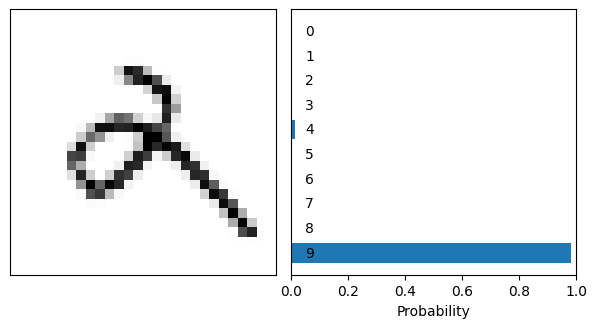

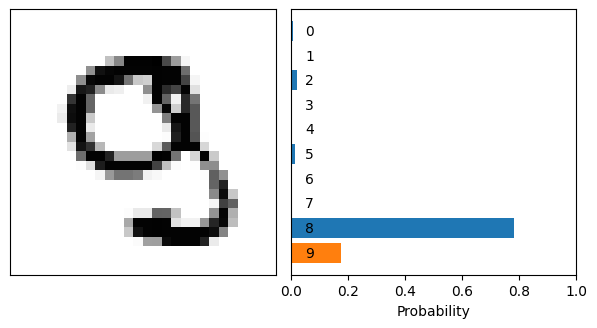

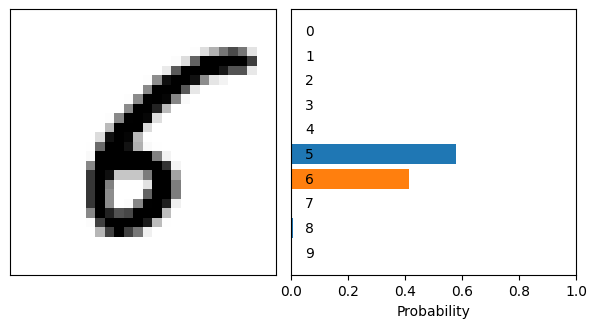

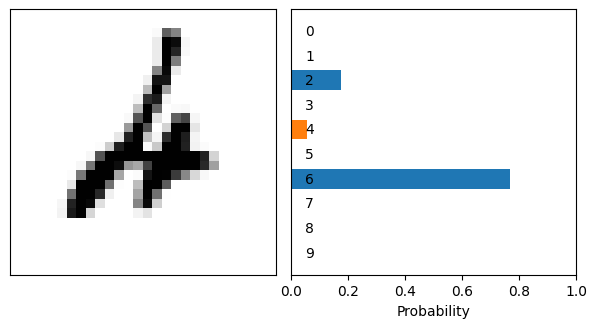

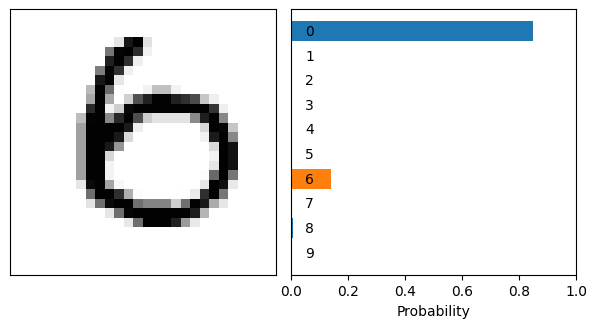

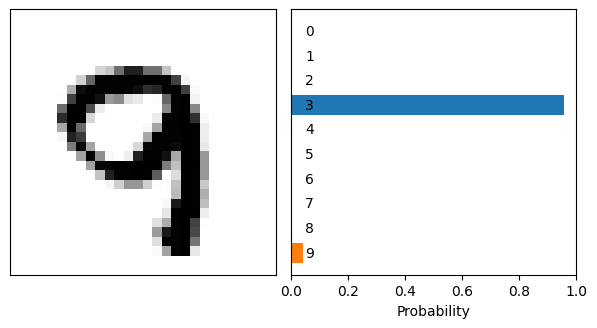

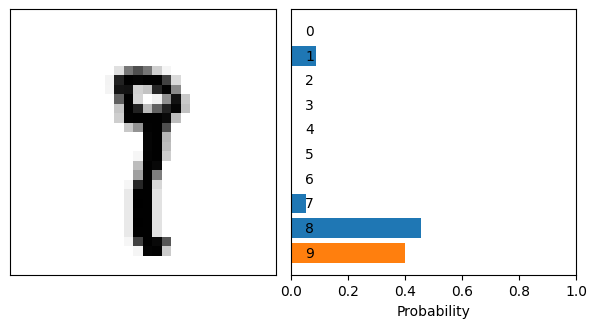

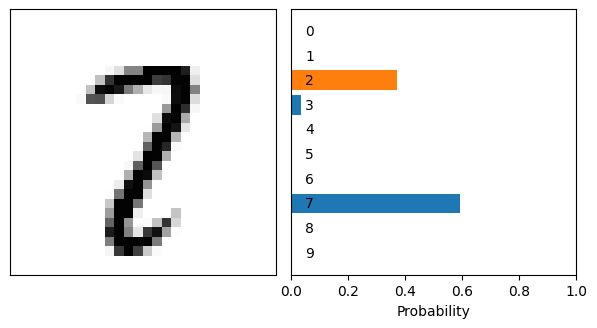

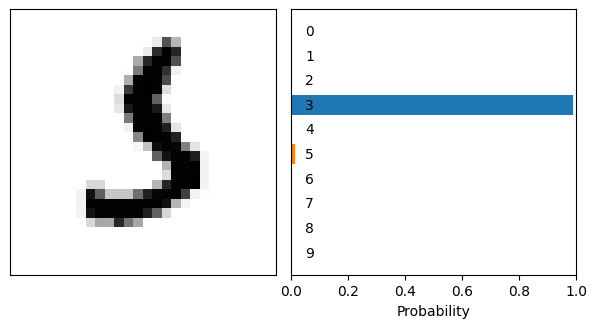

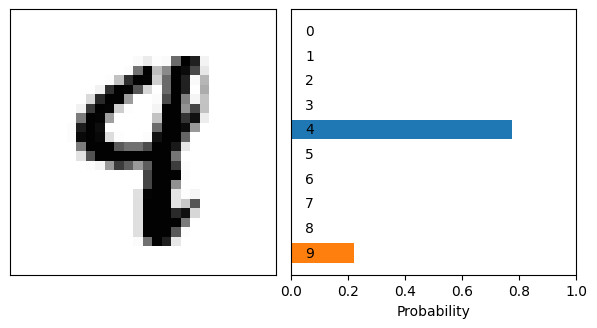

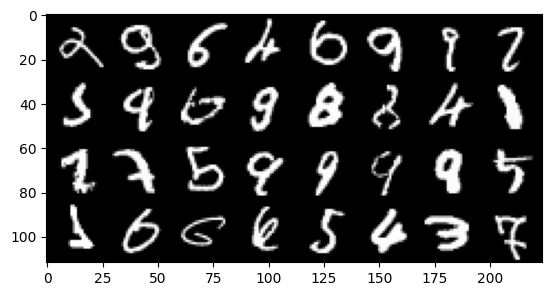

In [ ]:
# plot a few examples that were misclassified
indices_miss = np.nonzero(predictions != labels)[0]
#np.nonzero gibt die Indizes zurück bei denen die Vorhersage nicht stimmte
x_missid = x_test[indices_miss]
#holt die Bilder aus x_test die falsch klassifiziert wurden

# plot 10 misclassified examples
for i in indices_miss[:10]: #Schleife über die ersten 10 Fehlklassifizierungen
    plot_prediction(output[i],
                    255 * np.reshape(x_test[i], (28, 28)), # we need to reshape the data into an image and convert back to RGB color scale by multiplying with 255
                    labels[i])

# plot 32 misclassified examples in a joint plot
fig = plt.figure()
ax = fig.add_subplot(111)
plotdata = x_missid[:32]
plotdata = np.hstack(np.concatenate(np.reshape(plotdata, (4, 8, 28, 28)), axis=1))
ax.imshow(plotdata, cmap = "gray")

**Grid search**

Let's search the two hyperparameters dropout and number of nodes



### 🔧 To be done
Modify the lines marked with "...".


The following code will perform a grid search, training and evaluating models for different combinations of dropout and number of neurons.
Der folgende Code führt eine Grid-Suche durch - systematisches Ausprobieren verschiedener Parameterkombinationen, bei der Modelle für verschiedene Kombinationen von Dropout-Werten und Anzahl an Neuronen trainiert und bewertet werden.

In [ ]:
# define values for hyperparameters
dropout_values = [0.2, 0.35, 0.5]
n_neurons_values = [128, 256, 384]

# initialize results grid, es wird ein mehrdimensionales Array mit nullen erstellt
# Die form ist Dropout-Werte, Neuronenzahl und 2 Platzhalter für acccurancy und error rate
results_gridsearch = np.zeros((len(dropout_values), len(n_neurons_values), 2))

# Doppelschleife über hyperparameter die alle Kombinationen durch geht
for iDrop, drop in enumerate(dropout_values):
  for iN, n_neurons in enumerate(n_neurons_values):
    # für alle Kombinationen wird ein Modell erstellt
    model = tf.keras.models.Sequential([
        layers.Dense(n_neurons, input_shape=(input_shape,), activation='relu'),
        layers.Dropout(drop),                         # reguläres Dropout zwischen den Schichten
        layers.Dense(int(n_neurons / 2), activation='relu'),
        layers.Dropout(drop),
        layers.Dense(10, activation='softmax')        # Klassifikationsausgabe
    ])

    # compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        metrics=['accuracy']
    )

    # train model
    results = model.fit(
        x_train, y_train_onehot,
        validation_data = (x_valid, y_valid_onehot),
        batch_size = 32,
        epochs = 10,
        verbose = 0
        )

    # evaluate on test set
    t = model.evaluate(x_test, y_test_onehot, verbose = 0, batch_size = 128)
    results_gridsearch[iDrop, iN] = t
    print(f"dropout = {drop:.2f}, {n_neurons} neurons -> accuracy {results_gridsearch[iDrop, iN][1]:.3f}, error rate = {100*(1-results_gridsearch[iDrop, iN][1]):.1f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dropout = 0.20, 128 neurons -> accuracy 0.976, error rate = 2.4%
dropout = 0.20, 256 neurons -> accuracy 0.978, error rate = 2.2%
dropout = 0.20, 384 neurons -> accuracy 0.979, error rate = 2.1%
dropout = 0.35, 128 neurons -> accuracy 0.975, error rate = 2.5%
dropout = 0.35, 256 neurons -> accuracy 0.978, error rate = 2.2%
dropout = 0.35, 384 neurons -> accuracy 0.979, error rate = 2.1%
dropout = 0.50, 128 neurons -> accuracy 0.967, error rate = 3.3%
dropout = 0.50, 256 neurons -> accuracy 0.977, error rate = 2.3%
dropout = 0.50, 384 neurons -> accuracy 0.976, error rate = 2.4%


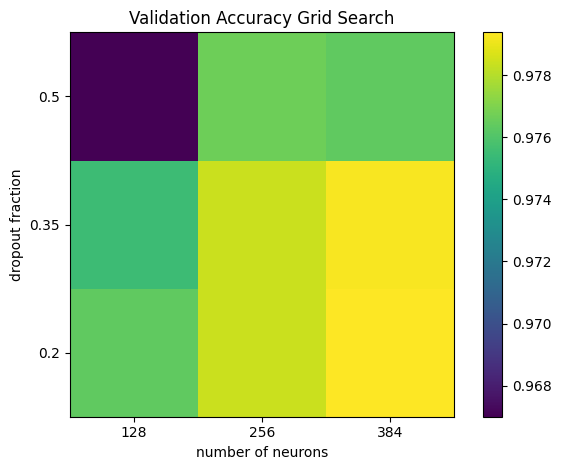

In [ ]:
# erstellung einer Heatmap aus den Ergebnissen der Grid Suche
fig, ax = plt.subplots(1, 1)
pos = ax.imshow(results_gridsearch[:, :, 1], origin='lower')
fig.colorbar(pos, ax=ax)

ax.set_xlabel("number of neurons")
ax.set_ylabel("dropout fraction")

# richtige Anzahl Ticks
ax.set_yticks(range(len(dropout_values)))
ax.set_yticklabels(dropout_values)

ax.set_xticks(range(len(n_neurons_values)))
ax.set_xticklabels(n_neurons_values)

plt.title("Validation Accuracy Grid Search")
plt.tight_layout()
plt.show()

### 🔧 To be done
Modify the lines marked with "...".


Now lets implement a random search. A random search allows us to scan more hyperparameters at once without more computing time.

In [ ]:
# define number of trials
# hier werden 20 zufällige Kobinationen aus vielen Hyperparametern erstellt
# und dann wieder compiliert, trainiert und evaluiert
N = 20

search = {
    'batch_size': np.random.choice([16, 32, 64, 128, 256], N),
    'num_neurons': np.random.choice([8, 32, 128, 256, 512], N),
    'learn_rate': np.random.choice([-5, -4, -3, -2, -1], N),  # Exponent für 10^x
    'activation': np.random.choice(['relu', 'elu', 'sigmoid', 'tanh'], N),
    'dropout': np.random.choice([0.0, 0.1, 0.2, 0.3, 0.5, 0.6], N),
    'val_acc': np.zeros(N)
}

best_val_loss_mean_std = []

for i in range(N):
    n_neurons = search['num_neurons'][i]
    act = search['activation'][i]
    drop = search['dropout'][i]
    lr = 10.0 ** search['learn_rate'][i]
    bs = search['batch_size'][i]

    # build model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_neurons, input_shape=(input_shape,), activation=act),
        tf.keras.layers.Dropout(drop),
        tf.keras.layers.Dense(int(n_neurons / 2), activation=act),
        tf.keras.layers.Dropout(drop),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=['accuracy']
    )

    # train model
    results = model.fit(
        x_train, y_train_onehot,
        validation_data=(x_valid, y_valid_onehot),
        batch_size=bs,
        epochs=10,
        verbose=0
    )

    # evaluate model
    search['val_acc'][i] = model.evaluate(x_test, y_test_onehot, verbose=0, batch_size=128)[1]
    print(f"iteration {i}:")
    for key in search:
        print(f"\t{key}: {search[key][i]}")
    print(f"\t-> accuracy {search['val_acc'][i]:.3f}, error rate = {100*(1-search['val_acc'][i]):.1f}%")

    # store validation loss for each trial
    val_loss = results.history['val_loss'][-1]
    best_val_loss_mean_std.append(val_loss)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


iteration 0:
	batch_size: 256
	num_neurons: 32
	learn_rate: -5
	activation: tanh
	dropout: 0.3
	val_acc: 0.6627500057220459
	-> accuracy 0.663, error rate = 33.7%
iteration 1:
	batch_size: 32
	num_neurons: 8
	learn_rate: -1
	activation: sigmoid
	dropout: 0.6
	val_acc: 0.20262500643730164
	-> accuracy 0.203, error rate = 79.7%
iteration 2:
	batch_size: 128
	num_neurons: 128
	learn_rate: -1
	activation: relu
	dropout: 0.1
	val_acc: 0.19975000619888306
	-> accuracy 0.200, error rate = 80.0%
iteration 3:
	batch_size: 32
	num_neurons: 512
	learn_rate: -1
	activation: tanh
	dropout: 0.0
	val_acc: 0.1016250029206276
	-> accuracy 0.102, error rate = 89.8%
iteration 4:
	batch_size: 128
	num_neurons: 32
	learn_rate: -4
	activation: elu
	dropout: 0.1
	val_acc: 0.9175000190734863
	-> accuracy 0.918, error rate = 8.2%
iteration 5:
	batch_size: 256
	num_neurons: 128
	learn_rate: -4
	activation: elu
	dropout: 0.1
	val_acc: 0.9315000176429749
	-> accuracy 0.932, error rate = 6.8%
iteration 6:
	batch_s

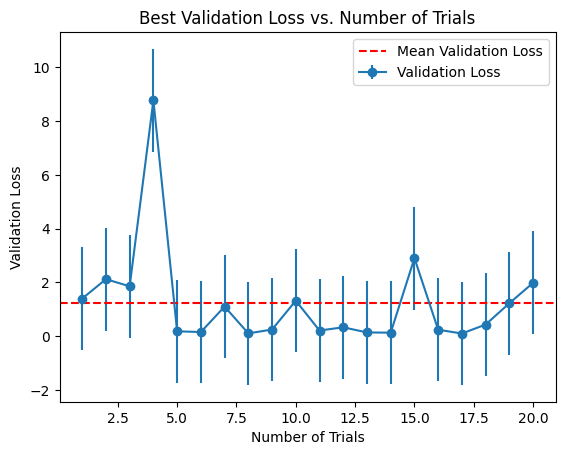

In [ ]:
# plot best validation loss (mean + std) vs. number of trials
mean_val_loss = np.mean(best_val_loss_mean_std) #mittelwert aller Validierungsverluste
std_val_loss = np.std(best_val_loss_mean_std)   #Standardabweichung
plt.errorbar(range(1, N + 1), best_val_loss_mean_std, yerr = std_val_loss, fmt = '-o', label = 'Validation Loss')
#versuch 1 bis 20, Validierungsverlust je versuch, yerr -> Fehlerbalken für die Standardabweichung über alle 20 versuche
plt.axhline(y = mean_val_loss, color = 'r', linestyle = '--', label = 'Mean Validation Loss')
#Horizontale rote linie
plt.xlabel('Number of Trials')
plt.ylabel('Validation Loss')
plt.title('Best Validation Loss vs. Number of Trials')
plt.legend()
plt.show()